<div style="text-align: right"> CS824 - Material for Lab 2c (2021) </div>

## Central Limit Theorem (CLT) demo - linked to Week 2 lab submission

We have noted that the CLT states that, "the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger - **irrespective** of the underlying distribution from which the data, that these sample means estimate, have been taken."

Let's try this out for a situation where we **_know_** that we are NOT working with a Normal distribution - the case of a 6-sided die where we are talking about a (discrete) *Uniform* distribution with each of the values 1 to 6 being equally likely.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
from scipy import stats


### Setting up our 'virtual' die ("die" is the singular of "dice")

In [2]:
'''
Let's start off throwing the die 10 times - our 'expected value' over a large number of rolls will 
be 3.5 but we expect a fair bit of variation due to random chance.

We use the 'randint' function which is a *discrete* uniform distribution returning only intergers, here [1-6].
If we used "random.uniform(0,7)" we should get an almost identical average, but that would be like rolling a
die with an infinite number of 'sides' (between 1 and 6)!!

I am going to set a random seed, so that my commentary below matches the specific outcomes discussed.
If you feel this is 'cheating' feel free to alter (or remove) that line once you have read/run, to make sure 
that the same behaviour is observed, irrespective of the random seed choosen (include none selected).
'''

seed(17)

# Note: 'randint' (and indeed 'unifrom') are so-called "half-open" intervals, i.e. they include the lower 
# bound (here 1), but exclude the upper bound. 
# (There is actually another option, "random_integers{1,6)" which uses a closed interval.}

die_10_times = np.random.randint(1,7,10)

print(die_10_times)
print(np.average(die_10_times));

[2 2 1 6 5 5 5 2 2 2]
3.2


So, we can see the results of each of the 10 rolls of the die and their average = 3.2 (not that far away from the 'expected' value of 3.5, but also not exactly that close).

I chose my seed above (17) at 'random' and happened to get the value of 3.2. 

See what would have happened if I had happened to choose:
 - **seed = 19**   (You might have thought I was 'cheating'!)
 - or **seed = 15**   (Not very close to the expected value).
 
However, the point is that 10 throws is not that many for a variable that can take on any one of six values, so we really need to run a longer experiment.


### What happens in we roll a die 100, 1,000 or 10,000 times?


In [3]:
# So in addition to 10 times lets try rolling the die from 100 up to 10,000 times to see what happens...  
# In this case we will *not* want to print out all the throw values!  Better just to look at the averages.

die_10_times = np.random.randint(1,7,10)
die_100_times = np.random.randint(1,7,100)
die_1000_times = np.random.randint(1,7,1000)
die_10000_times = np.random.randint(1,7,10000)

print(np.average(die_10_times))
print(np.average(die_100_times))
print(np.average(die_1000_times))
print(np.average(die_10000_times));

3.1
3.42
3.524
3.5134


Before thinking about the trends in these results, a couple of things to note:
 - the value that you get for the 10 throws case is NOT the same as you got in the first experiment, can you explain why?
 - I have not carried out any nice formatting on the outputs but you can see that they are typically given to 1, 2, 3 and 4 decimal places. Think about why this is the case. In actual fact the numbers we are generating here in the averages are NOT continuous values, rather they are discrete (just not on the integer number line).
 
For example, in the '10 dice thrown' example, because we are taking 10 values and then dividing the total obtained by 10, the list of possible values must belong to the set [1.0, 1.1, 1.2, 1.3, ... 5.9, 6.0] - i.e. this is one of 60 **discrete** values. In the case of 10,000 throws it may look like we have a 'continuous' value - e.g. "3.5134" - but again this is in fact one value from a possible set of 60,000 discrete values.


In [4]:
# And for those who *need* to see 'raw' values...  you can take a look at the 1,000 rolls case!!

print(die_1000_times);

[3 5 2 6 2 4 6 2 3 6 6 4 1 3 2 5 3 5 2 1 2 1 6 6 6 4 3 3 1 3 5 4 1 2 2 3 5
 3 1 3 2 1 2 4 4 2 6 4 2 3 3 5 6 2 6 3 6 4 1 3 3 1 1 3 2 6 6 4 5 4 1 4 5 1
 1 5 6 5 4 2 5 3 2 1 1 4 6 3 6 3 3 3 4 6 2 2 5 2 5 6 1 1 6 4 2 3 4 3 5 1 5
 4 6 4 3 6 1 4 5 5 3 3 4 4 2 1 1 6 4 5 1 1 1 4 2 1 6 2 3 1 2 3 4 5 5 1 6 1
 6 6 4 1 3 5 5 1 2 2 2 3 5 6 6 6 6 2 1 5 2 2 5 1 2 3 3 3 5 4 3 4 5 4 5 3 5
 3 6 4 3 1 6 5 3 2 3 5 2 3 6 1 6 6 2 1 3 3 4 3 4 5 6 2 6 1 3 1 6 2 4 2 2 6
 5 3 1 5 6 5 2 6 4 5 5 5 6 1 4 5 5 1 1 5 6 4 1 6 3 1 4 4 6 2 2 5 2 5 3 4 1
 1 2 5 2 2 6 4 1 1 6 6 3 3 2 2 1 1 5 1 4 1 1 2 2 3 4 6 6 5 1 2 5 1 1 5 4 5
 2 5 3 4 2 1 2 1 4 6 1 5 5 3 3 5 3 6 6 3 2 5 4 6 5 2 2 5 1 4 5 5 5 2 4 2 3
 3 2 5 6 4 3 4 5 4 4 2 6 5 1 4 1 1 3 4 4 4 2 6 2 1 2 6 6 2 3 2 3 6 4 3 1 2
 6 4 3 6 6 5 3 3 4 2 4 1 2 4 4 2 1 4 6 6 1 1 3 2 6 5 4 5 6 3 1 2 1 2 2 6 1
 3 2 2 5 4 3 4 6 2 5 6 2 4 4 6 2 5 2 1 5 6 3 2 3 1 3 4 4 2 6 2 2 4 4 5 5 4
 4 4 5 2 2 4 5 5 4 2 3 6 3 1 1 5 4 6 5 5 1 3 1 1 4 3 2 1 6 4 4 2 5 4 5 5 2
 4 1 4 3 5 6 6 5 6 4 1 3 

As expected the estimate tends to converge closer to the **expected value of 3.5** as we take more and more samples (make more rolls and take their average). If you ran the code above a few times you may have seen that this was not always the case, particularly with the larger numbers of throws, i.e. 10,000 is often not that much better, and sometimes worse, than 1,000 throws. However, what we have considered so far is the **Law of Large Numbers** at work, *NOT* the Central Limit Theoerm.

### Central Limit Theorem

To explore the CLT we need to look at the **sampling distribution** of the sample means, which should approach a *Normal* distribution as the number of samples included gets larger (irrespective of the underlying distribution).


In [5]:
# Lets try 1000 simulations of our 10 die roll case (for which know that each estimate can be quite far away
# from the expected value - e.g. 3.2 and many worse in the examples above)

seed(17)
n = 1000

# Create an empty array into which we will insert each of the 1000 averages for 10 rolls
avg_tens_estimates = []

# For each simulation('experiment'), roll the die 10 times and capture the average value
for i in range(1,n):
    a = np.random.randint(1,7,10)
    avg_tens_estimates.append(np.average(a))

In [6]:
# We could take a look at the first 5 averages of these 1000 10-die roll experiments
avg_tens_estimates[0:5]

[3.2, 3.1, 3.8, 3.2, 2.9]

#### NB:
You can see that the first entry in this list is our old friend "3.2" from the earlier simulation - due to the fact that we have again used the "seed(17)" statement to prime the values from our random number generator.


### The moment of truth... what does the distribution look like?

If the CLT is valid, then despite the fact that none of these individual estimates is that close to 3.5 (and that they each come from a Uniform distribution), the overall 'shape' of these 1,000 sample means taken together should start to resemble a Normal distribution.


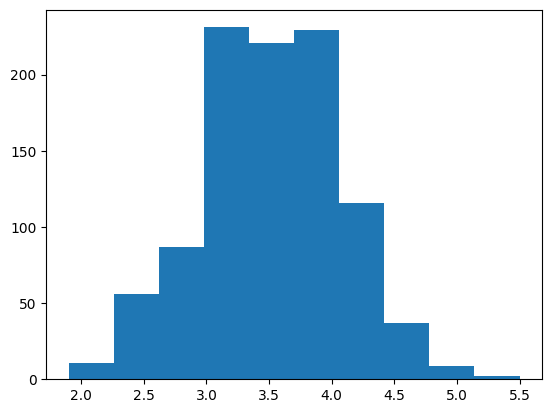

In [7]:
# Plot the distribtion of these sample means

plt.hist(avg_tens_estimates)
plt.show();


### So, yes this is roughly symmertical around 3.5 and seems approximately 'Normal', but the values around 3.0-3.2 and 3.8-4.0 seem to have a higher absolute value than the exact 'expected' value of 3.5 

We could look at 10,000 experiments...


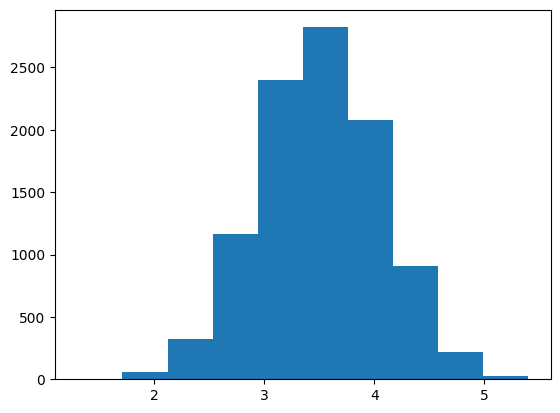

In [8]:
# Lets try 10,000 simulations of our 10 die roll case

seed(12)
n = 10000

# Create an empty array into which we will insert each of the 1000 averages for 10 rolls
avg_tens_estimates2 = []

# For each simulation('experiment'), roll the die 10 times and capture the average value
for i in range(1,n):
    a = np.random.randint(1,7,10)
    avg_tens_estimates2.append(np.average(a))
    
plt.hist(avg_tens_estimates2)
plt.show();

Well maybe a bit more 'Normal' but remember that each trial returns a limited set of values (each one is divided by 10 and as such is only different by at most 0.x - i.e. one decimal place).

Thus we should really call on the Law of Large numbers as well as CLT to get a 'nicer' graphical output. 

Let's stick to the 10,000 experiments, but within each let's explore 100 rolls of the die in each experiment, rather than just 10.


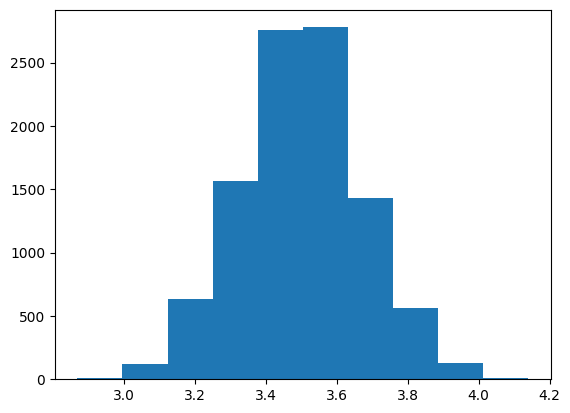

In [9]:
# Lets try 10,000 simulations of a 100 die roll

seed(21)
n = 10000

# Create an empty array into which we will insert each of the 1000 averages for 10 rolls
avg_hundreds_estimates = []

# For each simulation('experiment'), roll the die 100 times and capture the average value
for i in range(1,n):
    a = np.random.randint(1,7,100)
    avg_hundreds_estimates.append(np.average(a))
    
plt.hist(avg_hundreds_estimates)
plt.show();

### 'Pictures' can be powerful

OK, so hopefully you now get the picture...  You should note that the actual scale on the x-axis has automatically been altered (as have the widths of the 'bins'). It is usually fine to let the plotting algorithm make selections for elements such as axis limits and bin-width (at least initially). However, particularly if you want to compare between scenarios it is sometimes wise to manually 'fix' these elements so as to ensure that you are making comparisons over simular outputs.

If you have time, look at the "plt.hist" function in *matplotlib* and work with the same axis and bin width for the 'tens' and 'hundreds' case, and see whether you feel it makes the point more strongly...  I think it does.


### Don't always trust your eyes

However, despite the fact that I have been emphasising the importance of EDA and 'taking a look' (wherever possible) at the data, there are also cases where graphical output is misleading or inadequate. For example, rather than looking at the histograms of these experiments, we could run a more formal statistical test of normality and see what that revealed about the various options we have so far tried...


In [10]:
# When we conatenate the values from these two distributions, one with mean 0 and the other with mean 2 (both
# with SD = 1,) we would not expect a 'normal' outcome - more likely some sort of bi-modal distribution.
# We are only going to use the p-value part of what is returned from the function - i.e. not the 'statistic' itself


stat, p_estm1 = stats.normaltest(avg_tens_estimates)
stat, p_estm2 = stats.normaltest(avg_tens_estimates2)
stat, p_estm3 = stats.normaltest(avg_hundreds_estimates)

alpha = 0.01

print("p-value for normality on the 1,000 experiments with a 10-die role = {:.4f}".format(p_estm1))
if p_estm1 < alpha:                        # null hypothesis: sample comes from a normal distribution
    print("The null hypothesis can be rejected, i.e. this sample likely did NOT come from a Normal distribution")
else:
    print("The null hypothesis cannot be rejected, i.e. this sample likely comes from a Normal distribution")

print()
print("p-value for normality on the 10,000 experiments with a 10-die role = {:.4f}".format(p_estm2))
if p_estm2 < alpha:                        # null hypothesis: sample comes from a normal distribution
    print("The null hypothesis can be rejected, i.e. this sample likely did NOT come from a Normal distribution")
else:
    print("The null hypothesis cannot be rejected, i.e. this sample likely comes from a Normal distribution")

print()    
print("p-value for normality on the 10,000 experiments with a 100-die role = {:.4f}".format(p_estm3))
if p_estm3 < alpha:                        # null hypothesis: sample comes from a normal distribution
    print("The null hypothesis can be rejected, i.e. this sample likely did NOT come from a Normal distribution")
else:
    print("The null hypothesis cannot be rejected, i.e. this sample likely comes from a Normal distribution")


p-value for normality on the 1,000 experiments with a 10-die role = 0.8575
The null hypothesis cannot be rejected, i.e. this sample likely comes from a Normal distribution

p-value for normality on the 10,000 experiments with a 10-die role = 0.1466
The null hypothesis cannot be rejected, i.e. this sample likely comes from a Normal distribution

p-value for normality on the 10,000 experiments with a 100-die role = 0.7750
The null hypothesis cannot be rejected, i.e. this sample likely comes from a Normal distribution


### A note of caution

So for this set of examples ALL of the cases appear to meet the assumption that they came from a Normal distribution. (Well, strictly speaking, we can only say that we cannot reject the null hypothesis that the likely did not come from a Normal distribution!)

However, you may wish to go back to the "avg_tens_estimates2" case and **alter** the `seed` from 12 to 21. If you do this you should find that the second set of experiments does NOT conform to the Normal case. i.e. the p-value in that text is <0.00001 and as such the null hypothesis CAN be rejected - i.e. the test appears to suggest that the data did **not** come from a Normal distribution, despite the CLT!!  You can see visually that this choice of random seed does indeed seem to lead to a set of estimates that demonstates a much stronger right-hand skew. Such can be the challenges of trying to make generalisations when working with random samples!!


## Lab submission for Week2

What I would like you to do within your small group is look at the Law of Large Numbers and the Central Limit Theorem in the context of the **'pi estimation'** code that you developed in Week 1.

You may already have looked at this a bit (at least the Law of Large Numbers) in that you noticed that as a general rule your estimates tended to get better as you increased the number of 'darts'. However, you may have seen that this was not always the case. Also, even with just 100 or certainly 1,000 darts you should be able to get some interesting results if you take the values of each experiment as a sample mean for pi and then look at the distribution of those sample means.

I am not going to be prescriptive in terms of how you tackle this submission. However, I would like to see code and outputs that demonstrate the fact that you have absorbed the ideas in the exercises above and have then applied those to your own 'pi estimation' experiments. 

Here are a few things that I will be looking for:

 - a decent amount of **comments** within your code so that I can understand the steps you took;
 - some **graphical outputs** that let me easily see the overall effects of different choiced you have made;
 - some **comparisons** to make a point. e.g. Let's assume you had 1M darts to throw, what difference does it make if you throw all 1M of these at the board and get an estimate, compares to throwing 1,000 darts in 1,000 different experiments (i.e. the same overall number of darts) and looking at the mean of these 1,000 estimates for pi?;
 - at least one example of using a **normality test** (i.e. rather than just relying on 'eye-balled' the data).

### BONUS Marks
Depending on how 'Pythonic' you made your original pi estimation function, you may or may not need to re-implement things a bit for this part of the exercise. You should create 'for loop' and 'numpy does the heavy lifting' versions of your pi estimator function and then put these within a 'timer' setting to compare their relative performance. (You will likely have to run, say 1M simulations to see a meaningful difference - i.e. at a few 1,000 simulations the times may all be down in the sub 1 second time-frame.) 


I will be setting up the submission link so that you only need to make ONE file submission per group. (However, don't forget to include the Group_name as part of the filename of your submitted file.) 


### Getting $\pi$ as a sample
We will consider the result of throwing $n$ darts and calculating $\pi$ as ONE sample. This sample comes from an unknown distribution, but we expect that its mean approaches $\pi$, which is the expected value, as the number of samples $m$ tends to infinity. This is the Law of Large Numbers.

In [11]:
def one_experiment(n):
    """
    Returns an approximation of pi by throwing darts inside a square and counting how many fall inside a circle.
    
    :param n: number of dart throws
    """
    x = np.random.uniform(-1,1,n) # x coordinates (as an array of n)
    y = np.random.uniform(-1,1,n) # y coordinates (as an array of n)
    inside_circle = x*x + y*y <= 1 # this checks whether (x,y) is inside the circle of radius 1 (as a boolean array)
    count_in = inside_circle.sum() # how many were inside?
    return 4 * count_in / n # Circle / square $ = \pi a^2/(2a)^2 = \pi / 4$. Therefore, $\pi = 4 * \# $ darts in circle / $\#$ darts in square ($=N$).

### Distribution of the mean of $m$ experiments
During this convergence, the mean of the experiments will follow a normal distribution. This is the Central Limit Theorem.

In [12]:
def m_experiments(n,m):
    """
    Returns an array of m obtentions of pi
    
    :param n: number of dart throws for each experiment
    :param m: length of result array
    """
    return [one_experiment(n) for _ in range(m)]
    
def whole_experiment(n,m,k,s):
    seed(s)
    dart_precision = n
    number_of_experiments = m
    number_of_samples = k
    arr = []
    for _ in range(number_of_samples):
        estimates = m_experiments(dart_precision,number_of_experiments)
        arr += [ np.mean(estimates) ]
    plt.hist(arr,bins=number_of_experiments)
    plt.show()

    sts, p_est = stats.normaltest(arr)
    alpha = 0.01
    print("p-value for normality on the {} experiments with a {}-dart pi approximation = {:.4f}".format(number_of_experiments,dart_precision,p_est))
    if p_est < alpha:                        # null hypothesis: sample comes from a normal distribution
        print("The null hypothesis can be rejected, i.e. this sample likely did NOT come from a Normal distribution")
    else:
        print("The null hypothesis cannot be rejected, i.e. this sample likely comes from a Normal distribution")

If we only throw 2 darts, the below distribution will be less accurate. However, the mean of 100 experiments will follow a slightly warped normal distribution (50 samples chosen)

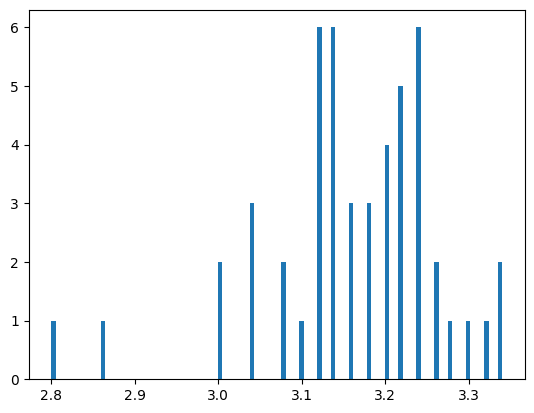

p-value for normality on the 100 experiments with a 2-dart pi approximation = 0.0004
The null hypothesis can be rejected, i.e. this sample likely did NOT come from a Normal distribution


In [13]:
whole_experiment(2,100,50,42)

Taking more samples will give a fuller normal distribution shape, thus following the CLT.

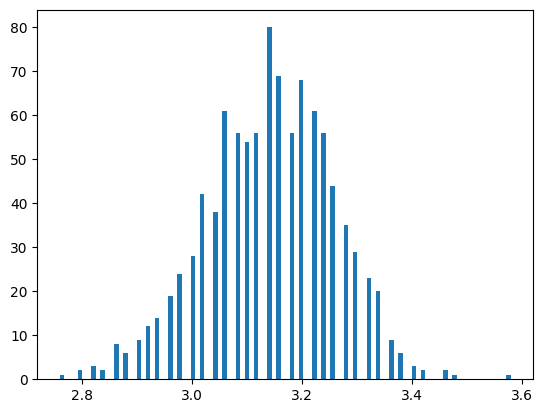

p-value for normality on the 100 experiments with a 2-dart pi approximation = 0.0570
The null hypothesis cannot be rejected, i.e. this sample likely comes from a Normal distribution


In [14]:
whole_experiment(2,100,1000,42)

However, changing the number of experiments done when taking the mean skews the distribution

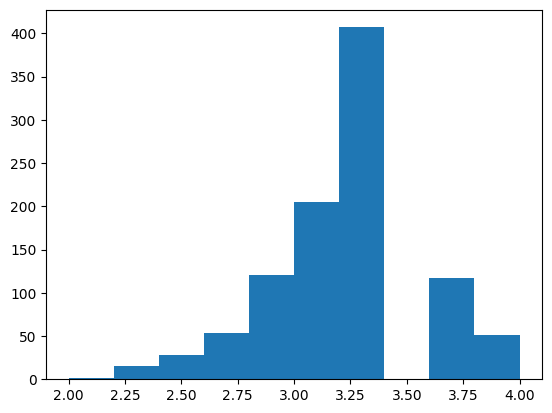

p-value for normality on the 10 experiments with a 2-dart pi approximation = 0.0002
The null hypothesis can be rejected, i.e. this sample likely did NOT come from a Normal distribution


In [15]:
whole_experiment(2,10,1000,42)

### Bonus solution

In [16]:
def one_worse_experiment(n,count_in=0):
    """
    Returns an approximation of pi by throwing darts inside a square and counting how many fall inside a circle.
    
    :param n: number of dart throws
    :param count_in: (optional) number of darts in the circle, to be updated
    """
    for _ in range(n): # we throw the dart
        x = np.random.uniform(-1,1) # x coordinate
        y = np.random.uniform(-1,1) # y coordinate
        if x*x + y*y <= 1: # this checks whether (x,y) is inside the circle of radius 1
            count_in += 1 # if it is, add one to the count
    return 4 * count_in / n # explanation in markdown below
    

Here we compare both algorithms in terms of time spent calculating experiments

In [19]:
import time

n = 100
m = 10000

good_start_time = time.perf_counter()
for _ in range(m):
    one_experiment(n)
good_end_time = time.perf_counter()

bad_start_time = time.perf_counter()
for _ in range(m):
    one_worse_experiment(n)
bad_end_time = time.perf_counter()

print('With {} experiments throwing {} darts in each, we count the time they take'.format(m,n))
print('The good one was {:2f} while the bad one was {:2f}'.format(good_end_time-good_start_time,bad_end_time-bad_start_time))

With 10000 experiments throwing 100 darts in each, we count the time they take
The good one was 0.156251 while the bad one was 3.939758
